359.2310651813519


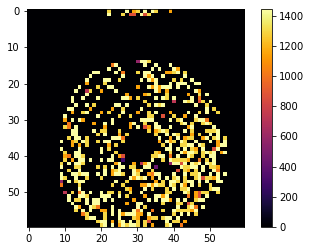

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from image_array_creation import createImageArray
import scipy.io
from T1_creation import getT1

rawData = scipy.io.loadmat('C:/Users/juanr/Desktop/Universidad/Master/Practicas/programa calculo t1t2/NMR-t1-t2-calculator/rawdata/t1Orang/2022.03.29 (1)/Old_RARE.2022.03.29 (1)')
nPoints = [60,60,10]
nImages = 12
tVector = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000])
path = 'C:/Users/juanr/Desktop/Universidad/Master/Practicas/programa calculo t1t2/NMR-t1-t2-calculator/rawdata/t1Orang/2022.03.29'
name = '/Old_RARE.2022.03.29' # Directory and name until the day
imagen = createImageArray(path, name, nImages)

# Get mask
mask = np.squeeze(imagen[int(nPoints[2] / 2), :, :])
mask = mask / np.max(mask[:])
mask[mask < 0.1] = 0
mask[mask >= 0.1] = 1

# Get t1 for all pixels (I use ms as time units)
t1Map = np.zeros((nPoints[1], nPoints[0]))
for x in range(nPoints[1]):
    for y in range(nPoints[0]):
        if mask[y, x]==1:
            t1Map[y, x] = getT1(imagen, nImages, tVector, nPoints, [x, y])
t1Map[t1Map>2e3] = 0    # Just in case there is a huge T1 value due to fitting error

meat_segment = t1Map[20:30,26:36]

print(np.average(meat_segment))

plt.figure(1)
plt.imshow(t1Map, cmap='inferno')
plt.colorbar()
#plt.clim(0,1500)
plt.show()
